In [116]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
sns.set(font_scale = 1.4) 
sns.set_style('white')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)


In [117]:
#import data
df = pd.read_csv('C:/Users/lesda/OneDrive/Documents/Portfolio/Movies-Python/movies.csv')

In [118]:
#Begin familiarizing myself with the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [119]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


In [120]:
#Investigate for missing data
for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()) * 100, 2)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


<AxesSubplot:>

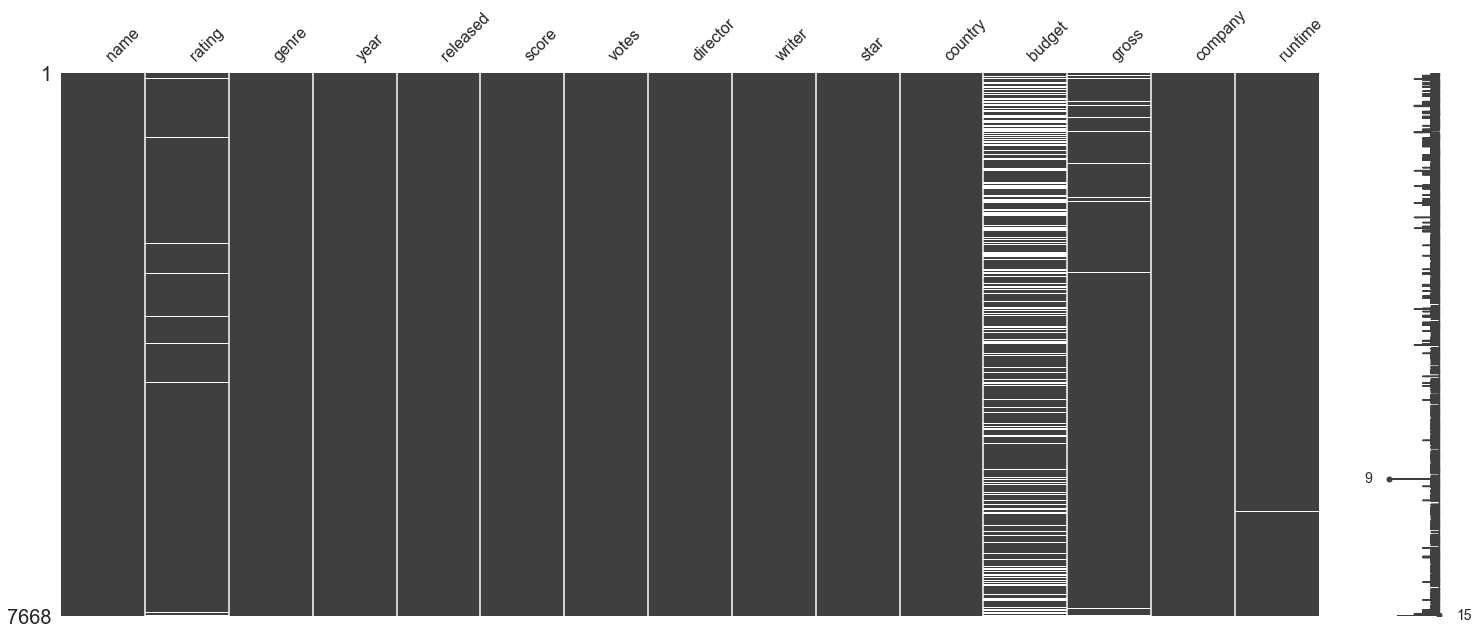

In [121]:
msno.matrix(df) #Shows budget NaN is random through column 

In [122]:
#Doesn't make sense to impute any value for that many budget values and other columns have negligible NaN values. I have
#decided to drop all NaN rows for these reasons (since budget is the topic of our analysis). In a real world scenario.
#I would try to locate budget data on these movies and left merge the dataset on name, genre, and release year acting as keys,
#then use fillna() function to combine budget columnsinto one.
df = df.dropna()

In [123]:
#Changing Data Types of Columns from float to integer to remove unnecessary decimal place
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [124]:
#Creating new column with the correct year since the year column doesn't match the release year column for all records
df['correct_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [125]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [126]:
#Inspect for any duplicates if any exist
duplicates = df.duplicated(subset = ['name','year'], keep = False) 
df[duplicates].sort_values(by = 'name') 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year


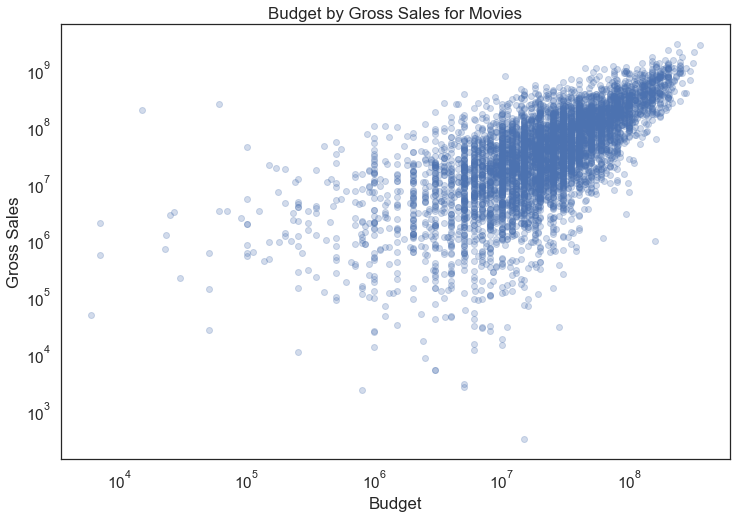

In [127]:
#Checking correlations beginning with budget vs. gross columns with visualization
plt.rcParams.update({'font.size': 10})
plt.scatter(x = df['budget'], y = df['gross'], alpha = 0.25)
plt.xlabel('Budget')
plt.ylabel('Gross Sales')
plt.title('Budget by Gross Sales for Movies')
plt.xscale('log')
plt.yscale('log') 
plt.show()


Text(0.5, 1.0, 'Budget by Gross Sales for Movies')

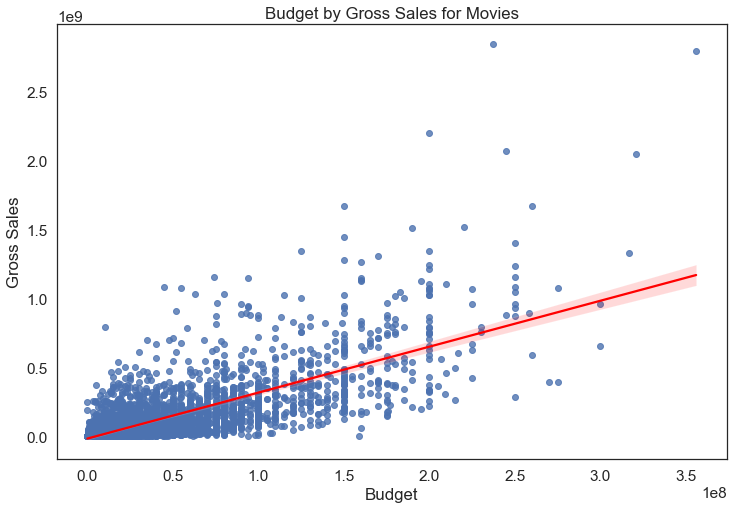

In [114]:
# Plot the budget vs gross in a regression plot
sns.regplot(x='budget', y='gross', data=df, line_kws={'color' : 'red'})
plt.xlabel('Budget')
plt.ylabel('Gross Sales')
plt.title('Budget by Gross Sales for Movies')

In [128]:
# Check correlation with quantitative data. It appears that budget and gross columns have highest r value of 0.74, which
# makes sense.
df.corr()

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


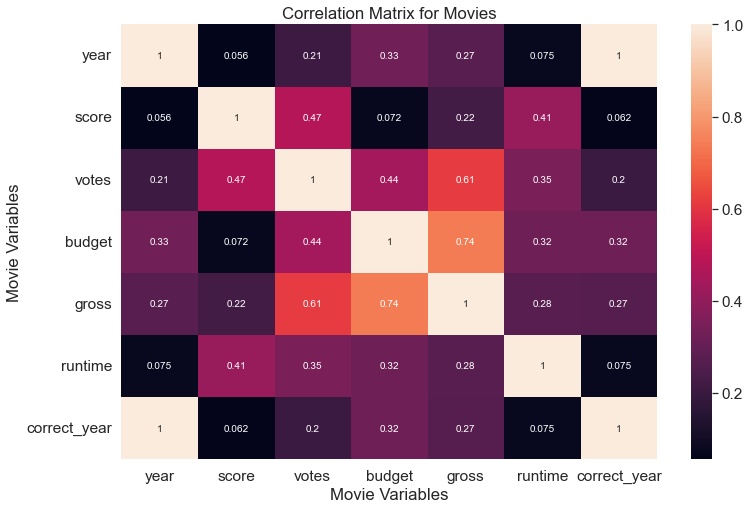

In [131]:
# Visualizing correlation to make it easier to scan correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Movies')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')
plt.show()

In [132]:
# Convert categorical data to codes to inspect their correlation
df_coded = df
for col_name in df_coded.columns:
        if(df_coded[col_name].dtype == 'object'):
            df_coded[col_name] = df_coded[col_name].astype('category')
            df_coded[col_name] = df_coded[col_name].cat.codes
df_coded        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,2020


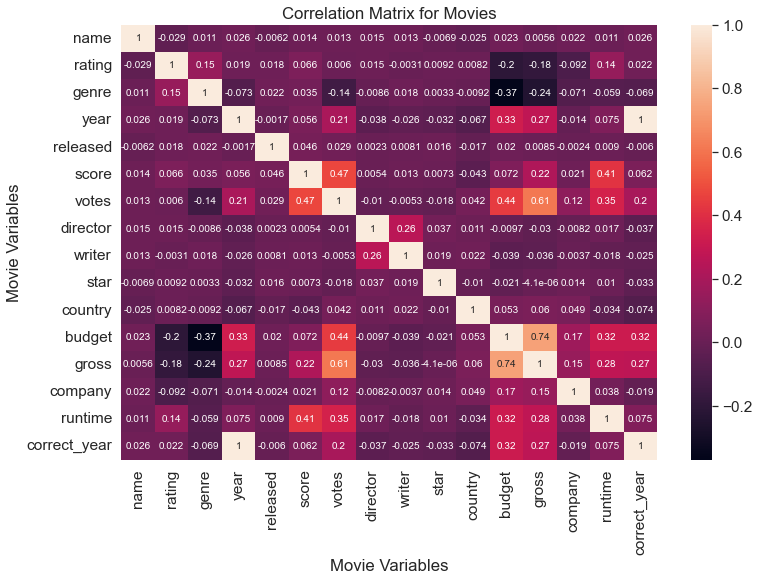

In [133]:
correlation_matrix = df_coded.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Movies')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')
plt.show()

In [140]:
corr_pairs = df_coded.corr().unstack().sort_values(ascending = False)
high_corr = corr_pairs[(corr_pairs > 0.3) & (corr_pairs < 0.99)]
high_corr

budget        gross           0.740247
gross         budget          0.740247
              votes           0.614751
votes         gross           0.614751
score         votes           0.474256
votes         score           0.474256
budget        votes           0.439675
votes         budget          0.439675
score         runtime         0.414068
runtime       score           0.414068
              votes           0.352303
votes         runtime         0.352303
budget        year            0.327722
year          budget          0.327722
correct_year  budget          0.320312
budget        correct_year    0.320312
runtime       budget          0.318695
budget        runtime         0.318695
dtype: float64

In [ ]:
# Interestingly enough is that there isn't a high correlation between company and gross sales or between directior/writer/star 
# and gross sales. It appears that votes and budget have the highest influence on gross sales. 